In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def set_style():
    """
    Configure the visual style for all plots to ensure consistency and aesthetic appeal.
    Uses a modern, clean design inspired by academic publications.
    """
    # Set the overall style to a clean, modern look
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Configure custom color palette with carefully chosen colors
    colors = {
        'primary': '#2E86AB',      # Steel blue for main data points
        'secondary': '#F24236',    # Coral red for reference lines
        'tertiary': '#36F1CD',     # Mint for auxiliary elements
        'background': '#F5F5F5'    # Light gray for plot background
    }
    
    return colors

def create_exponential_qq_plot(data, ax, title, show_histogram=True):
    """
    Create an aesthetically pleasing Exponential Q-Q plot with enhanced visual elements.
    
    Parameters:
    -----------
    data : array-like
        The data to be plotted (assumed to be exponentially distributed)
    ax : matplotlib axis
        The axis to plot on
    title : str
        Title for the plot
    show_histogram : bool
        Whether to show the enhanced histogram inset
    """
    colors = set_style()
    
    # Sort the data and calculate positions
    ordered_data = np.sort(data)
    n = len(data)
    plotting_positions = np.arange(1, n + 1) / (n + 1)
    
    # Calculate theoretical quantiles
    mu_hat = np.mean(data)
    theoretical_quantiles = -mu_hat * np.log(1 - plotting_positions)
    
    # Create main Q-Q plot with enhanced aesthetics
    scatter = ax.scatter(theoretical_quantiles, ordered_data,
                        alpha=0.7, 
                        color=colors['primary'],
                        label='Sample Data',
                        s=50,  # Larger point size
                        edgecolor='white',  # White edge for depth
                        linewidth=0.5)
    
    # Add styled reference line
    line_x = np.array([0, max(theoretical_quantiles)])
    line_y = line_x
    ax.plot(line_x, line_y, 
            linestyle='--',
            color=colors['secondary'],
            label='Reference Line',
            linewidth=2,
            alpha=0.8)
    
    # Add histogram with enhanced styling if requested
    if show_histogram:
        # Create inset axes with subtle background
        axins = ax.inset_axes([0.65, 0.1, 0.3, 0.3])
        axins.set_facecolor(colors['background'])
        
        # Create styled histogram
        hist_color = colors['primary']
        bins = np.min([30, n//10])  # Adaptive bin size
        axins.hist(data, bins=bins, density=True,
                  alpha=0.6, color=hist_color,
                  edgecolor='white', linewidth=0.5)
        
        # Add smooth exponential PDF
        x_range = np.linspace(0, max(data), 100)
        exponential_pdf = (1/mu_hat) * np.exp(-x_range/mu_hat)
        axins.plot(x_range, exponential_pdf,
                  color=colors['secondary'],
                  linewidth=2,
                  label='Exponential PDF')
        
        # Style the inset
        axins.set_title('Distribution Shape',
                       fontsize=10,
                       pad=10,
                       fontweight='bold')
        axins.tick_params(labelsize=8)
        axins.grid(True, alpha=0.3)
    
    # Enhanced main plot styling
    ax.set_xlabel('Theoretical Exponential Quantiles',
                 fontsize=11,
                 fontweight='bold')
    ax.set_ylabel('Sample Quantiles',
                 fontsize=11,
                 fontweight='bold')
    
    # Create a title with subtitle styling
    main_title, *subtitle = title.split('\n')
    ax.set_title(main_title + '\n' + '\n'.join(subtitle),
                 fontsize=12,
                 fontweight='bold',
                 pad=20)
    
    # Enhance legend appearance
    ax.legend(frameon=True,
             facecolor='white',
             edgecolor=colors['background'],
             fontsize=10)
    
    # Add subtle grid and set background
    ax.set_facecolor(colors['background'])
    ax.grid(True, alpha=0.3, linestyle=':')
    
    # Add border to plot
    for spine in ax.spines.values():
        spine.set_edgecolor(colors['background'])
        spine.set_linewidth(2)

def compare_distributions(nsamples: int):
    """
    Create an aesthetically enhanced comparison between distributions using Q-Q plots.
    Includes improved layout, typography, and visual hierarchy.
    """
    # Create figure with refined spacing
    fig = plt.figure(figsize=(20, 8))
    gs = fig.add_gridspec(1, 3, hspace=0, wspace=0.2)
    axes = [fig.add_subplot(gs[0, i]) for i in range(3)]
    
    # Set overall style
    colors = set_style()
    fig.patch.set_facecolor('white')
    
    # Generate data with seed for reproducibility
    np.random.seed(42)
    
    # Create enhanced plots for each distribution
    distributions = [
        (np.random.exponential(scale=2.0, size=nsamples),
         "True Exponential Distribution\nPoints follow the reference line"),
        (np.random.gamma(shape=2, scale=2, size=nsamples),
         "Gamma Distribution\nNote the curved deviation"),
        (np.random.lognormal(mean=0, sigma=1, size=nsamples),
         "Log-normal Distribution\nNote the strong upward curve")
    ]
    
    for ax, (data, title) in zip(axes, distributions):
        create_exponential_qq_plot(data, ax, title)
    
    # Add refined explanatory text
    explanation_style = dict(
        fontsize=10,
        fontfamily='sans-serif',
        bbox=dict(facecolor='white',
                 edgecolor=colors['background'],
                 alpha=0.9,
                 pad=10,
                 boxstyle='round,pad=0.5')
    )
    
    explanations = [
        (0.13, "Exponential Distribution:\nPoints closely follow the reference line,\n" +
         f"suggesting exponential behavior with μ ≈ 2.0"),
        (0.41, "Gamma Distribution:\nSubtle curvature indicates deviation\n" +
         "from pure exponential, while maintaining\nsimilar shape characteristics"),
        (0.68, "Log-normal Distribution:\nProminent upward curve reveals\n" +
         "significantly heavier tail than\nthe exponential distribution")
    ]
    
    for x_pos, text in explanations:
        fig.text(x_pos, 0.72, text, **explanation_style)
    
    # Add main title with enhanced styling
    fig.suptitle('Understanding Exponential Q-Q Plots:\nComparing Different Distributions',
                fontsize=16,
                fontweight='bold',
                y=1.05,
                fontfamily='sans-serif')
    
    plt.tight_layout()
    return fig

/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_53485/1859047775.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


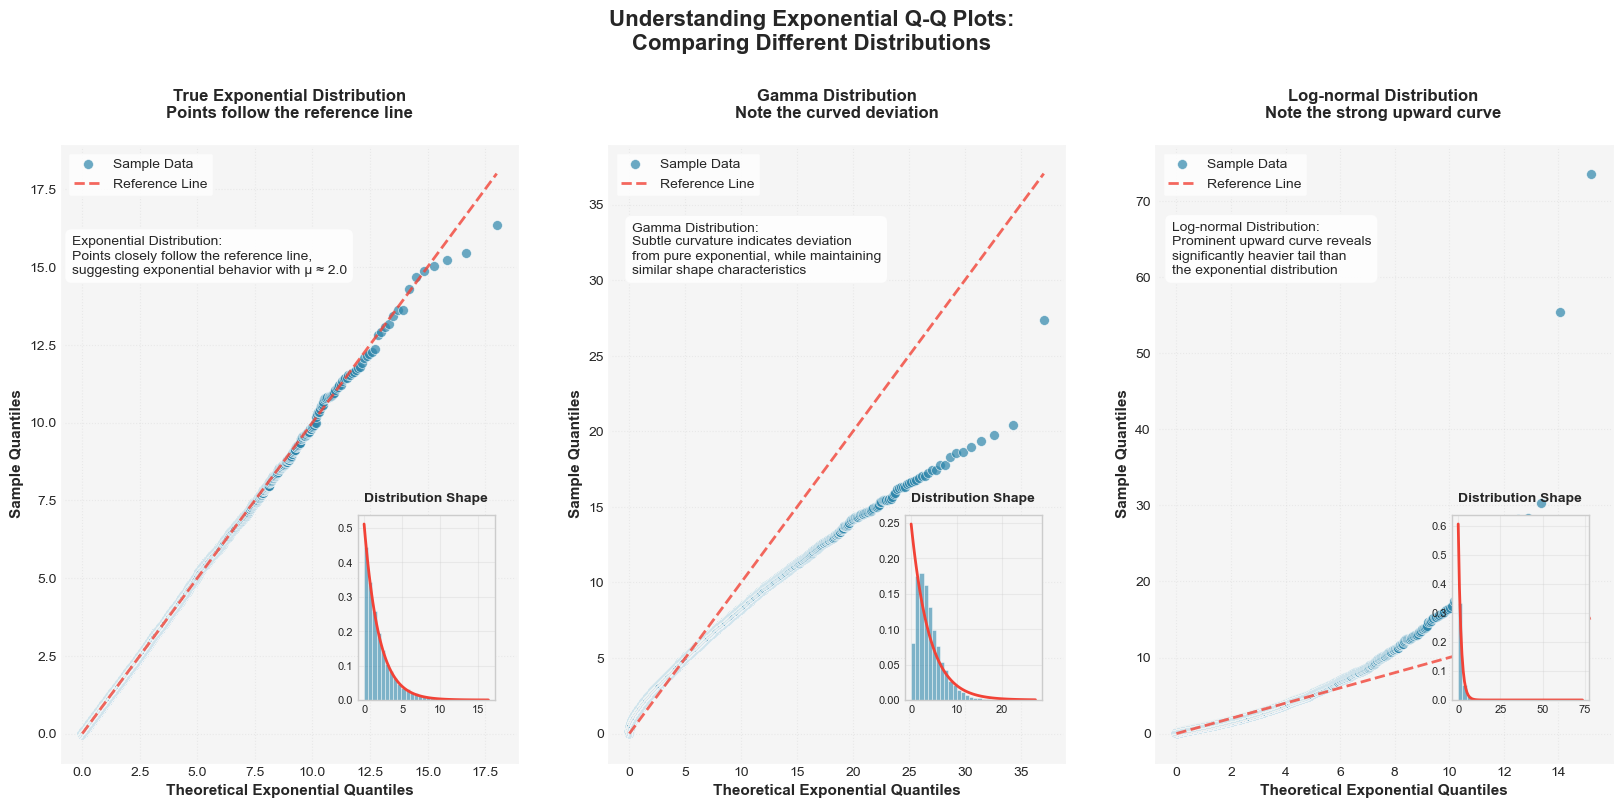

In [22]:
# Example usage
fig = compare_distributions(10000)
plt.show()